This exercise will require you to pull some data from the Qunadl API. Qaundl is currently the most widely used aggregator of financial market data.

As a first step, you will need to register a free account on the http://www.quandl.com website.

After you register, you will be provided with a unique API key, that you should store:

In [828]:
# Store the API key as a string - according to PEP8, constants are always named in all upper case
API_KEY = 'AupLi4uKzZZYj78xzfzd'

Qaundl has a large number of data sources, but, unfortunately, most of them require a Premium subscription. Still, there are also a good number of free datasets.

For this mini project, we will focus on equities data from the Frankfurt Stock Exhange (FSE), which is available for free. We'll try and analyze the stock prices of a company called Carl Zeiss Meditec, which manufactures tools for eye examinations, as well as medical lasers for laser eye surgery: https://www.zeiss.com/meditec/int/home.html. The company is listed under the stock ticker AFX_X.

You can find the detailed Quandl API instructions here: https://docs.quandl.com/docs/time-series

While there is a dedicated Python package for connecting to the Quandl API, we would prefer that you use the *requests* package, which can be easily downloaded using *pip* or *conda*. You can find the documentation for the package here: http://docs.python-requests.org/en/master/ 

Finally, apart from the *requests* package, you are encouraged to not use any third party Python packages, such as *pandas*, and instead focus on what's available in the Python Standard Library (the *collections* module might come in handy: https://pymotw.com/3/collections/ ).
Also, since you won't have access to DataFrames, you are encouraged to us Python's native data structures - preferably dictionaries, though some questions can also be answered using lists.
You can read more on these data structures here: https://docs.python.org/3/tutorial/datastructures.html

Keep in mind that the JSON responses you will be getting from the API map almost one-to-one to Python's dictionaries. Unfortunately, they can be very nested, so make sure you read up on indexing dictionaries in the documentation provided above.

In [829]:
# First, import the relevant modules
import requests


In [830]:
# Now, call the Quandl API and pull out a small sample of the data (only one day) to get a glimpse
# into the JSON structure that will be returned
API_KEY = 'AupLi4uKzZZYj78xzfzd'
url1='https://www.quandl.com/api/v3/datasets/FSE/AFX_X.json?api_key=AupLi4uKzZZYj78xzfzd&start_date=2020-01-19'
res = requests.get(url1)
#print(res)
#pulling a single day data

afx_day=res.json()
print (afx_day)


{'dataset': {'id': 10095370, 'dataset_code': 'AFX_X', 'database_code': 'FSE', 'name': 'Carl Zeiss Meditec (AFX_X)', 'description': 'Stock Prices for Carl Zeiss Meditec (2020-01-15) from the Frankfurt Stock Exchange.<br><br>Trading System: Xetra<br><br>ISIN: DE0005313704', 'refreshed_at': '2020-01-29T22:19:54.269Z', 'newest_available_date': '2020-01-29', 'oldest_available_date': '2000-06-07', 'column_names': ['Date', 'Open', 'High', 'Low', 'Close', 'Change', 'Traded Volume', 'Turnover', 'Last Price of the Day', 'Daily Traded Units', 'Daily Turnover'], 'frequency': 'daily', 'type': 'Time Series', 'premium': False, 'limit': None, 'transform': None, 'column_index': None, 'start_date': '2020-01-19', 'end_date': '2020-01-29', 'data': [['2020-01-29', 118.3, 118.8, 117.4, 117.7, None, 88563.0, 10438738.0, None, None, None], ['2020-01-28', 118.8, 119.6, 115.2, 118.1, None, 134333.0, 15754191.0, None, None, None], ['2020-01-27', 119.6, 119.7, 117.9, 118.0, None, 110778.0, 13126700.0, None, None,

In [831]:
# Inspect the JSON structure of the object you created, and take note of how nested it is,
# as well as the overall structure
print (afx_day.keys())

dict_keys(['dataset'])


In [832]:
print(afx_day["dataset"].keys())


dict_keys(['id', 'dataset_code', 'database_code', 'name', 'description', 'refreshed_at', 'newest_available_date', 'oldest_available_date', 'column_names', 'frequency', 'type', 'premium', 'limit', 'transform', 'column_index', 'start_date', 'end_date', 'data', 'collapse', 'order', 'database_id'])


In [833]:
print(afx_day["dataset"]["id"])

10095370


These are your tasks for this mini project:

1. Collect data from the Franfurt Stock Exchange, for the ticker AFX_X, for the whole year 2017 (keep in mind that the date format is YYYY-MM-DD).
2. Convert the returned JSON object into a Python dictionary.
3. Calculate what the highest and lowest opening prices were for the stock in this period.
4. What was the largest change in any one day (based on High and Low price)?
5. What was the largest change between any two days (based on Closing Price)?
6. What was the average daily trading volume during this year?
7. (Optional) What was the median trading volume during this year. (Note: you may need to implement your own function for calculating the median.)

In [834]:
url2= 'https://www.quandl.com/api/v3/datasets/FSE/AFX_X.json?api_key=AupLi4uKzZZYj78xzfzd&start_date=2016-12-31&end_date=2017-12-31'

In [835]:
res_year = requests.get(url2)

afx_2017=res_year.json()
print (afx_2017)


{'dataset': {'id': 10095370, 'dataset_code': 'AFX_X', 'database_code': 'FSE', 'name': 'Carl Zeiss Meditec (AFX_X)', 'description': 'Stock Prices for Carl Zeiss Meditec (2020-01-15) from the Frankfurt Stock Exchange.<br><br>Trading System: Xetra<br><br>ISIN: DE0005313704', 'refreshed_at': '2020-01-29T22:19:54.269Z', 'newest_available_date': '2020-01-29', 'oldest_available_date': '2000-06-07', 'column_names': ['Date', 'Open', 'High', 'Low', 'Close', 'Change', 'Traded Volume', 'Turnover', 'Last Price of the Day', 'Daily Traded Units', 'Daily Turnover'], 'frequency': 'daily', 'type': 'Time Series', 'premium': False, 'limit': None, 'transform': None, 'column_index': None, 'start_date': '2016-12-31', 'end_date': '2017-12-31', 'data': [['2017-12-29', 51.76, 51.94, 51.45, 51.76, None, 34640.0, 1792304.0, None, None, None], ['2017-12-28', 51.65, 51.82, 51.43, 51.6, None, 40660.0, 2099024.0, None, None, None], ['2017-12-27', 51.45, 51.89, 50.76, 51.82, None, 57452.0, 2957018.0, None, None, None]

In [836]:
print(type(afx_2017))

<class 'dict'>


In [837]:
print(afx_2017.keys())

dict_keys(['dataset'])


In [838]:
print(afx_2017["dataset"].keys())

dict_keys(['id', 'dataset_code', 'database_code', 'name', 'description', 'refreshed_at', 'newest_available_date', 'oldest_available_date', 'column_names', 'frequency', 'type', 'premium', 'limit', 'transform', 'column_index', 'start_date', 'end_date', 'data', 'collapse', 'order', 'database_id'])


In [839]:
print(afx_2017["dataset"]['column_names'])

['Date', 'Open', 'High', 'Low', 'Close', 'Change', 'Traded Volume', 'Turnover', 'Last Price of the Day', 'Daily Traded Units', 'Daily Turnover']


In [840]:
column_data= afx_2017["dataset"].get('data')

In [841]:
print(column_data[0])

['2017-12-29', 51.76, 51.94, 51.45, 51.76, None, 34640.0, 1792304.0, None, None, None]


In [842]:
open_data=[]
for row in column_data:
  open_data.append(row[1])

open_data_max= max([i for i in open_data if i is not None])
print("Highest opening price for 2017 is: %s" %open_data_max)
 

Highest opening price for 2017 is: 53.11


In [843]:
open_data_min=min([i for i in open_data if i is not None])
print("Lowest opening price for 2017 is: %s" %open_data_min)

In [844]:
high_data=[]
for high in column_data:
     high_data.append(high[2])
any(high_data) is None


False

In [845]:
len(high_data)

255

In [846]:
low_data=[]
for low in column_data:
     low_data.append(low[3])
any(low_data) is None


False

In [847]:
len(low_data)

255

In [848]:
difference_data = [(high_data - low_data) for high_data, low_data in zip(high_data, low_data)]
difference_data_max= max([i for i in difference_data])
print( "The largest change for a day is: "+"{:.2f}".format(difference_data_max))

The largest change for a day is: 2.81


In [849]:
close_data=[]
for close in column_data:
     close_data.append(close[4])
any(close_data) is None

False

In [850]:
close_day_difference=[abs(j-i) for i,j in zip(close_data, close_data[1:])]

In [851]:
close_day_difference_max= max([i for i in close_day_difference])

In [852]:
print("The largest change between any two days(based on Closing Price) is:"+"{:.2f}".format(close_day_difference_max))


The largest change between any two days(based on Closing Price) is:2.56


In [853]:
trade_vol_data=[]
for  trade in column_data:
     trade_vol_data.append(trade[6])
any(trade_vol_data) is None
print(len(trade_vol_data))


255


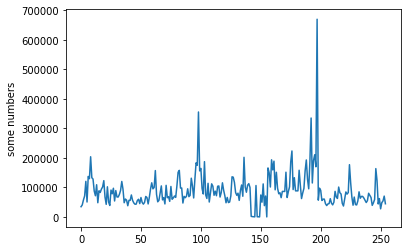

In [854]:
import matplotlib.pyplot as plt
plt.plot(trade_vol_data)
plt.ylabel('some numbers')
plt.show()

In [855]:
import statistics

avg_trade_vol = statistics.mean(trade_vol_data)
print("The average daily trading volume during 2017 is: "+"{:.2f}".format(avg_trade_vol))

The average daily trading volume during 2017 is: 89124.34


In [856]:
from statistics import median
median_trade_vol=median(trade_vol_data)
print("The median trading volume during 2017 is: "+"{:.2f}".format(median_trade_vol))

The median trading volume during 2017 is: 76286.00
